BNP_PARIBAS

In [145]:
%matplotlib inline

In [210]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn import cross_validation
from time import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [147]:

#Load train and test 

train_file = pd.read_csv('input/train.csv')
#test_file  = pd.read_csv('../input/test.csv')

In [148]:
train_file.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 108.6+ MB


In [149]:
train_file.head(4)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483


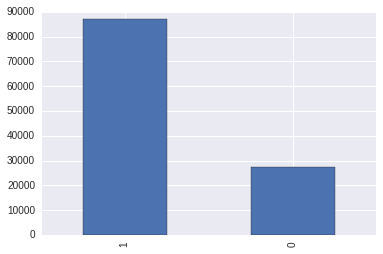

In [150]:
#target varibale 
train_file.target.value_counts().plot.bar()

In [151]:
uniquecount = [train_file[col].nunique() for col in train_file.columns.values]

In [152]:
uniquecount = pd.DataFrame(data=list(zip(train_file.columns.values,uniquecount)),columns = ["var","unique_count"])



#uniquecount=pd.DataFrame(data=list(zip(train.columns.values,uniquecount)),columns=["var","unique_count"])

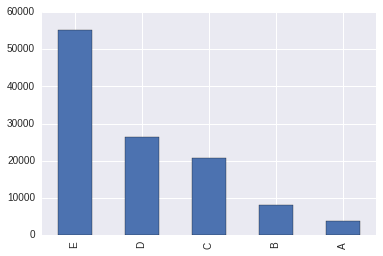

In [153]:
train_file.v24.value_counts().plot.bar()

/home/roma/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


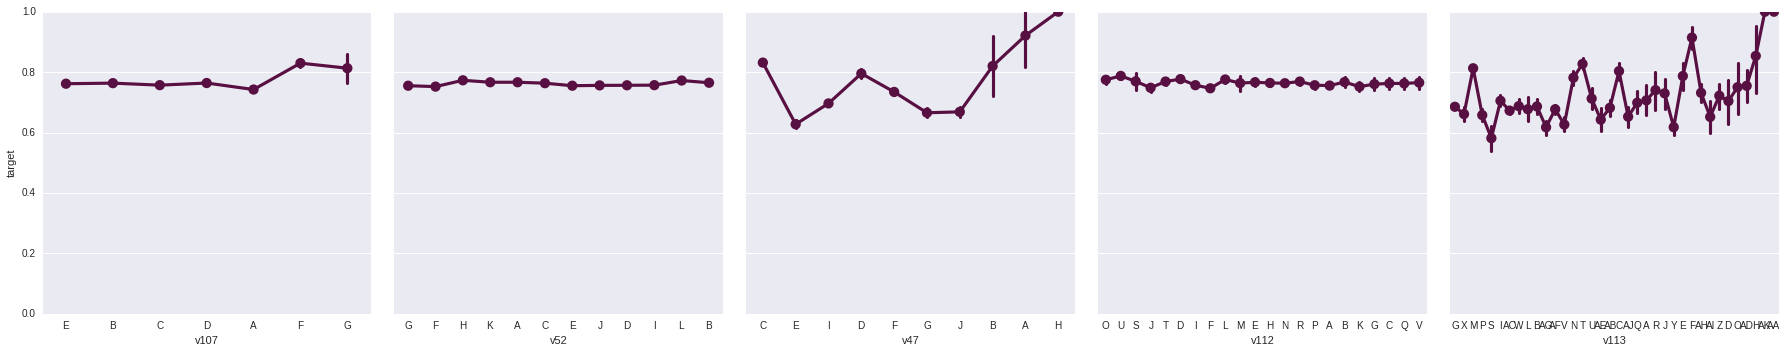

In [154]:
g = sns.PairGrid(train_file, y_vars="target",
                 x_vars=["v107","v52","v47","v112","v113"],
                 size=5,aspect=1.0)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

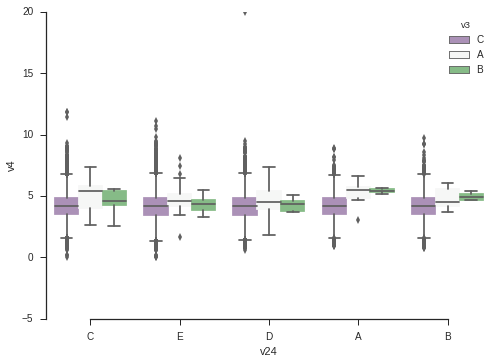

In [155]:
sns.set(style="ticks")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="v24", y="v4", hue="v3", data=train_file, palette="PRGn")
sns.despine(offset=0, trim=True)

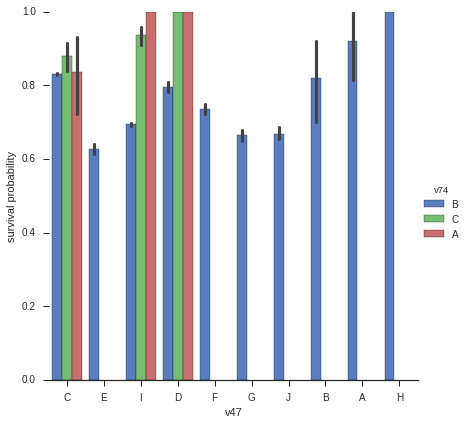

In [156]:
g = sns.factorplot(x="v47", y="target", hue="v74", data=train_file,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

In [157]:
for f in train_file.columns:
    if train_file[f].dtype=='object':
        print (f,train_file[f].nunique())
        lbl = LabelEncoder()
        lbl.fit(list(train_file[f].values))
        train_file[f] = lbl.transform(list(train_file[f].values))
train_file = train_file.fillna(-1)

v3 3
v22 18210
v24 5
v30 7
v31 3
v47 10
v52 12
v56 122
v66 3
v71 9
v74 3
v75 4
v79 18
v91 7
v107 7
v110 3
v112 22
v113 36
v125 90


In [158]:
#Train file to X and split on trin and test 
target = train_file.target
train_file.drop("target", axis=1)
train_file.drop("ID", axis=1)
X = train_file
train, test, target_train, target_test = train_test_split(X,target, test_size = 0.2 , random_state = 45)


In [197]:
#Build_logistic regresion model
prob_log = LogisticRegression(C=11,dual=False,max_iter=50, penalty='l2')
prob_log.fit(train,target_train)

LogisticRegression(C=11, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [198]:
prob_log.score(train,target_train)

0.76610610566829951

In [199]:
prob_log.score(test,target_test)

0.76846708943800568

In [200]:
pred_test= prob_log.predict_proba(test)
pred_train = prob_log.predict_proba(train)
print(metrics.log_loss(target_test,pred_test))
print(metrics.log_loss(target_train,pred_train))

0.466511595991
0.468296875592


In [201]:
scores = cross_validation.cross_val_score(prob_log, train, target_train,cv=5, scoring='roc_auc',n_jobs = 2)

In [202]:
scores

array([ 0.61354359,  0.60729522,  0.67351802,  0.65519689,  0.68563852])

In [220]:
# use a full grid over all parameters
param_grid = {"C": [10,11]
             }

grid_search = GridSearchCV(prob_log, param_grid=param_grid,scoring = "log_loss",n_jobs = 2,cv = 5)
start = time()
grid_search.fit(train, target_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))

GridSearchCV took 83.65 seconds for 2 candidate parameter settings.


In [221]:
grid_search.best_score_

-0.5241642540008834

In [222]:
grid_search.best_params_

{'C': 10}